In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [9]:
df = pd.read_csv(r'C:\Users\USER\Desktop\AQI and Lat Long of Countries.csv')
df.head()

Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2              Brazil  Presidente Dutra         41         Good             1   
3               Italy   Priolo Gargallo         66     Moderate             1   
4              Poland         Przasnysz         34         Good             1   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category      lat      lng  
0             Good               51           Moderate  44.7444  44.2031  
1             Good               41               Good  -5.2900 -44.4900  
2             Good               41               Good -11.2958 -41.9869  
3             Good               66           Moderate  37.1667  15.1833  
4             Good               20               Good  53.0167  20.8833

In [10]:
df=df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16393 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16393 non-null  object 
 2   AQI Value           16393 non-null  int64  
 3   AQI Category        16393 non-null  object 
 4   CO AQI Value        16393 non-null  int64  
 5   CO AQI Category     16393 non-null  object 
 6   Ozone AQI Value     16393 non-null  int64  
 7   Ozone AQI Category  16393 non-null  object 
 8   NO2 AQI Value       16393 non-null  int64  
 9   NO2 AQI Category    16393 non-null  object 
 10  PM2.5 AQI Value     16393 non-null  int64  
 11  PM2.5 AQI Category  16393 non-null  object 
 12  lat                 16393 non-null  float64
 13  lng                 16393 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.9+ MB


In [12]:
df.describe()

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  16393.000000  16393.000000     16393.000000   16393.000000   
mean      63.227902      1.349356        31.794424       3.851156   
std       43.297779      2.390045        22.975905       5.911545   
min        7.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        20.000000       0.000000   
50%       52.000000      1.000000        29.000000       2.000000   
75%       69.000000      1.000000        38.000000       5.000000   
max      500.000000    133.000000       222.000000      91.000000   

       PM2.5 AQI Value           lat           lng  
count     16393.000000  16393.000000  16393.000000  
mean         60.075520     30.330645     -4.223929  
std          43.378779     22.922043     72.909196  
min           0.000000    -54.801900   -159.771000  
25%          34.000000     16.730000    -75.283300  
50%          52.000000     38.880300      5.601900  
75%          69.000000     46.800000     36.183300  
max         500.000000     70.767000    178.017800

In [13]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [14]:
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
lat                   0
lng                   0
dtype: int64

In [15]:
df.dtypes

Country                object
City                   object
AQI Value               int64
AQI Category           object
CO AQI Value            int64
CO AQI Category        object
Ozone AQI Value         int64
Ozone AQI Category     object
NO2 AQI Value           int64
NO2 AQI Category       object
PM2.5 AQI Value         int64
PM2.5 AQI Category     object
lat                   float64
lng                   float64
dtype: object

In [16]:
df.corr()

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
AQI Value         1.000000      0.458529         0.328959       0.308275   
CO AQI Value      0.458529      1.000000         0.039960       0.398974   
Ozone AQI Value   0.328959      0.039960         1.000000      -0.252301   
NO2 AQI Value     0.308275      0.398974        -0.252301       1.000000   
PM2.5 AQI Value   0.980604      0.458980         0.234705       0.340821   
lat              -0.101673     -0.077734         0.247768       0.038933   
lng               0.155514      0.003489         0.323898      -0.290050   

                 PM2.5 AQI Value       lat       lng  
AQI Value               0.980604 -0.101673  0.155514  
CO AQI Value            0.458980 -0.077734  0.003489  
Ozone AQI Value         0.234705  0.247768  0.323898  
NO2 AQI Value           0.340821  0.038933 -0.290050  
PM2.5 AQI Value         1.000000 -0.127804  0.118152  
lat                    -0.127804  1.000000 -0.021740  
lng                     0.118152 -0.021740  1.000000

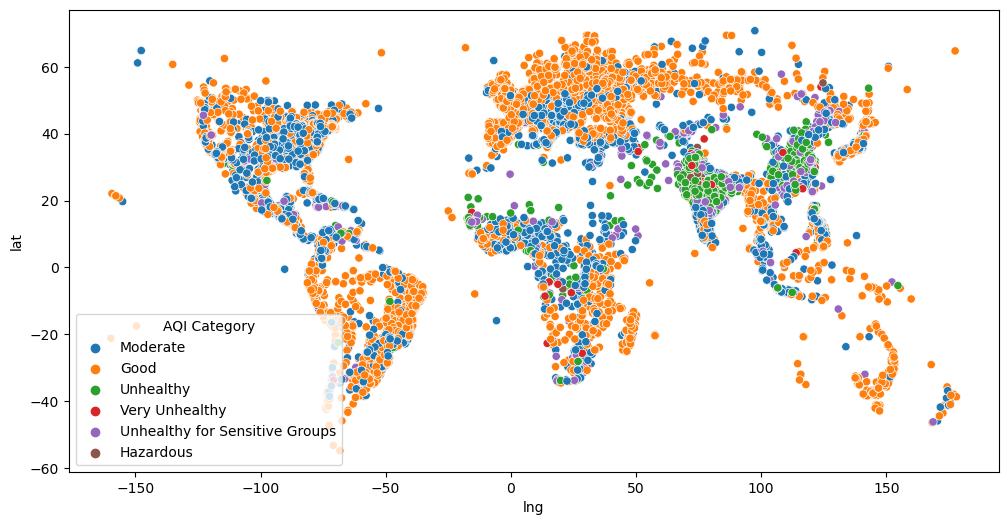

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='lng', y='lat', hue='AQI Category')
plt.show()

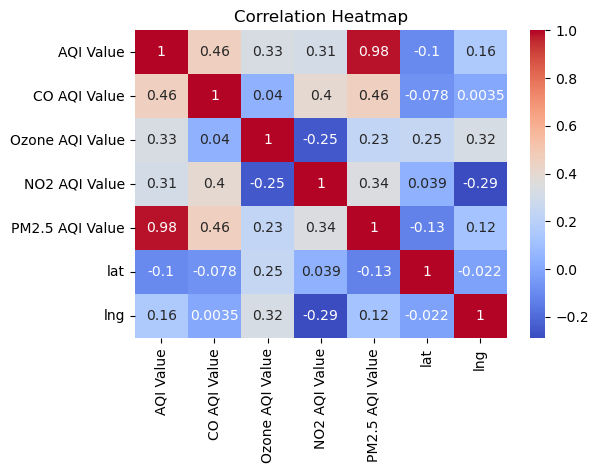

In [18]:
correlation_matrix = df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
features = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
target = 'AQI Value'


In [20]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
feature_importances = model.feature_importances_
results = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

In [23]:
results = results.sort_values(by='Importance', ascending=False)
results

Feature  Importance
3  PM2.5 AQI Value    0.974373
1  Ozone AQI Value    0.024923
0     CO AQI Value    0.000410
2    NO2 AQI Value    0.000295

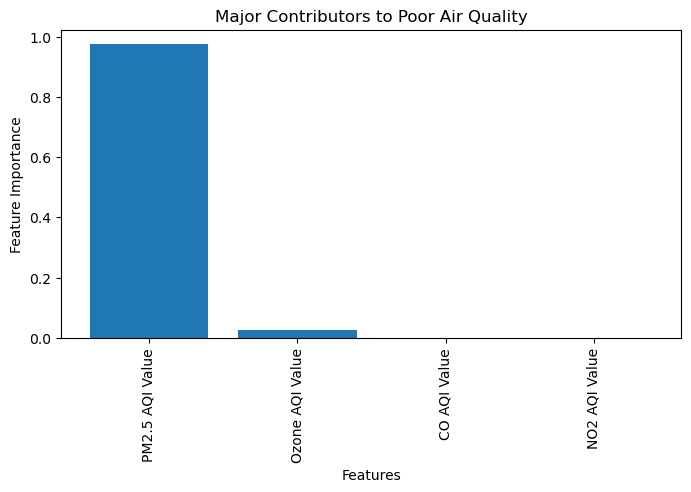

In [113]:
plt.figure(figsize=(8, 4))
plt.bar(results['Feature'], results['Importance'])
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Major Contributors to Poor Air Quality')
plt.xticks(rotation=90)
plt.show()

In [115]:
top_cities = df.groupby('City')['AQI Value'].max().sort_values(ascending=False).head(5)
print("\nCities with Highest AQI Values:")
print(top_cities)


Cities with Highest AQI Values:
City
Jodhpur      500
Boksburg     500
Maur         500
Jalalabad    500
Dhanaura     500
Name: AQI Value, dtype: int64


In [25]:
features = ['City', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'AQI Value']
df_selected = df[features].copy()

top_cities = df_selected.nlargest(5, 'AQI Value')

pollutant_columns = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
top_cities['Most Pollutant Element'] = top_cities[pollutant_columns].idxmax(axis=1)

print("Top 5 Cities with Highest AQI Values and Most Pollutant Elements:")
top_cities[['City', 'AQI Value', 'Most Pollutant Element']]

Top 5 Cities with Highest AQI Values and Most Pollutant Elements:


City  AQI Value Most Pollutant Element
203   Bahawalnagar        500        PM2.5 AQI Value
445      Harunabad        500        PM2.5 AQI Value
578   Mahendragarh        500        PM2.5 AQI Value
1623       Phalodi        500        PM2.5 AQI Value
1808       Jodhpur        500        PM2.5 AQI Value

In [27]:
bottom_cities = df_selected.nsmallest(5, 'AQI Value')

pollutant_columns = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
bottom_cities['Least Pollutant Element'] = bottom_cities[pollutant_columns].idxmax(axis=1)

print("Cities with Lowest AQI Values and Most Pollutant Elements:")
bottom_cities[['City', 'AQI Value', 'Least Pollutant Element']]

Cities with Lowest AQI Values and Most Pollutant Elements:


City  AQI Value Least Pollutant Element
6610        Macas          7         Ozone AQI Value
10496     Azogues          8         PM2.5 AQI Value
16559        Tari          8         Ozone AQI Value
5451       Huaraz          9         Ozone AQI Value
2615   Nueva Loja         10         PM2.5 AQI Value

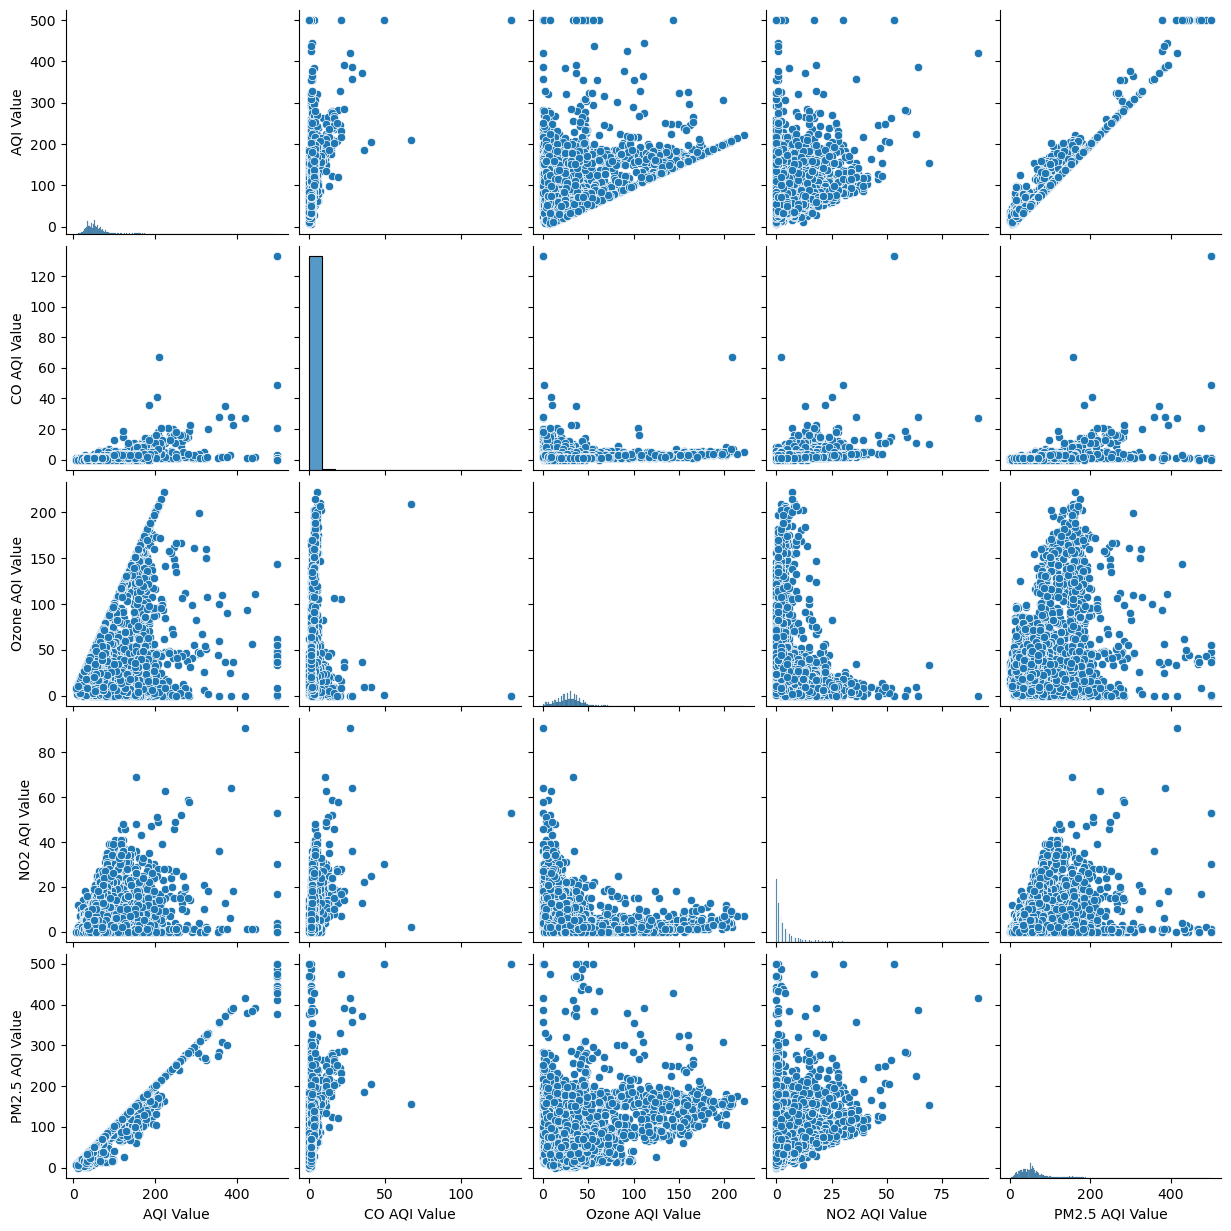

In [28]:
numeric_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

sns.pairplot(df[numeric_columns])

plt.show()

<Figure size 800x600 with 0 Axes>

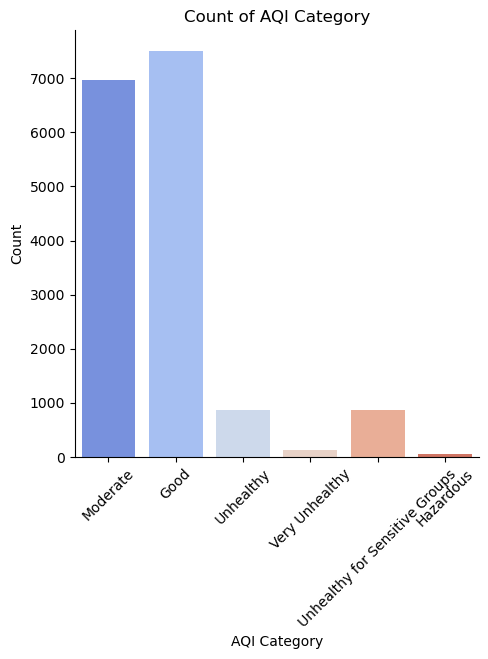

<Figure size 800x600 with 0 Axes>

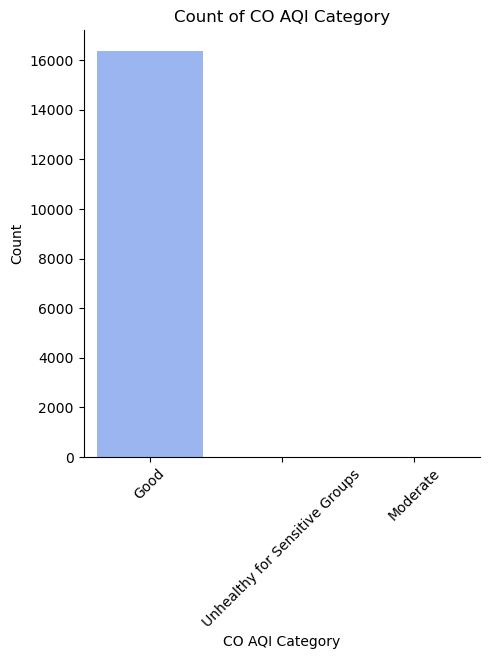

<Figure size 800x600 with 0 Axes>

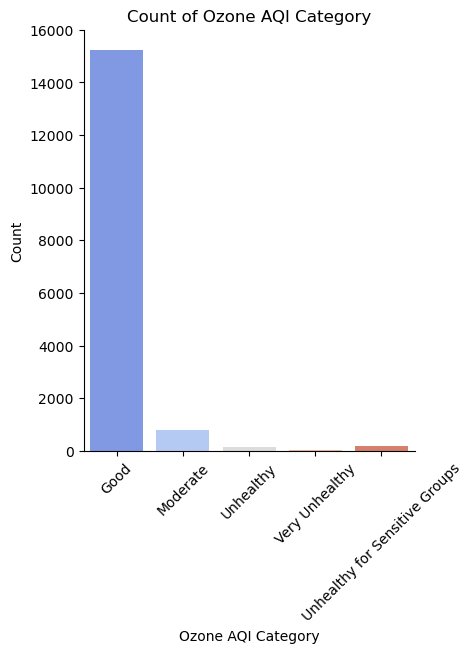

<Figure size 800x600 with 0 Axes>

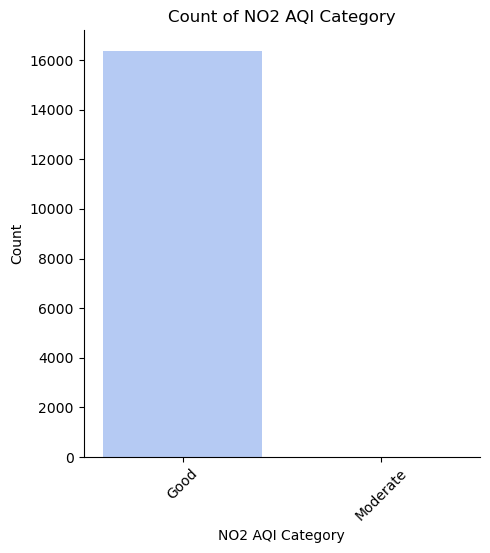

<Figure size 800x600 with 0 Axes>

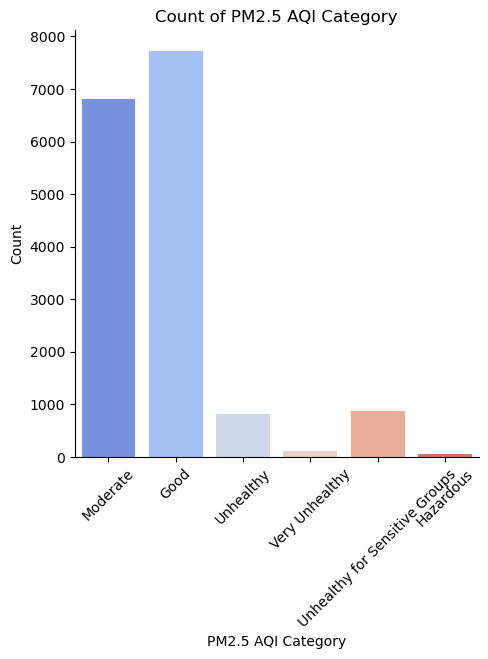

In [29]:
cat_attributes = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']

for attribute in cat_attributes:
    plt.figure(figsize=(8, 6))
    sns.catplot(x=attribute, kind='count', data=df, palette='coolwarm')
    plt.title(f'Count of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.show()

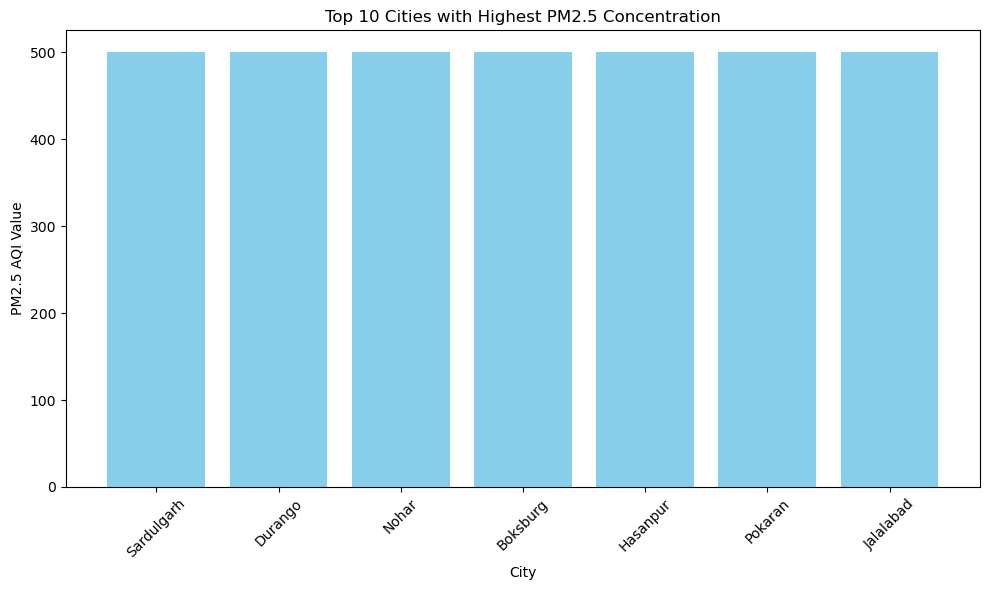

In [30]:
top_10_cities_pm = df.sort_values('PM2.5 AQI Value', ascending=False).head(10)

top_10_cities_pm = top_10_cities_pm.sort_values('PM2.5 AQI Value', ascending=False)

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_cities_pm['City'], top_10_cities_pm['PM2.5 AQI Value'], color='skyblue')
plt.xlabel('City')
plt.ylabel('PM2.5 AQI Value')
plt.title('Top 10 Cities with Highest PM2.5 Concentration')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [31]:
fig1= px.scatter(df,x="PM2.5 AQI Value",y="AQI Value")
fig1.show()

In [32]:
fig2= px.scatter(df,x="CO AQI Value",y="AQI Value")
fig2.show()

In [33]:
fig3= px.scatter(df,x="Ozone AQI Value",y="AQI Value")
fig3.show()

In [34]:
fig3= px.scatter(df,x="NO2 AQI Value",y="AQI Value")
fig3.show()

In [35]:
df['Suitable for Asthma Patients'] = df['AQI Value'].apply(lambda x: 'Yes' if x <= 100 else 'No')

suitable_locations = df[df['Suitable for Asthma Patients'] == 'Yes'][['Country', 'City', 'AQI Value', 'Suitable for Asthma Patients']]

print("Locations Suitable for Asthma Patients:")
suitable_locations

Locations Suitable for Asthma Patients:


Country              City  AQI Value  \
0            Russian Federation        Praskoveya         51   
1                        Brazil  Presidente Dutra         41   
2                        Brazil  Presidente Dutra         41   
3                         Italy   Priolo Gargallo         66   
4                        Poland         Przasnysz         34   
...                         ...               ...        ...   
16690  United States of America  Highland Springs         54   
16691                  Slovakia            Martin         71   
16692                  Slovakia            Martin         71   
16693                    France            Sceaux         50   
16694  United States of America       Westerville         71   

      Suitable for Asthma Patients  
0                              Yes  
1                              Yes  
2                              Yes  
3                              Yes  
4                              Yes  
...                            ...  
16690                          Yes  
16691                          Yes  
16692                          Yes  
16693                          Yes  
16694                          Yes  

[14503 rows x 4 columns]

In [36]:
def calculate_estimated_prevalence(row):
    pm25_aqi = row['PM2.5 AQI Value']
    no2_aqi = row['NO2 AQI Value']
    ozone_aqi = row['Ozone AQI Value']
    return pm25_aqi + no2_aqi + ozone_aqi
df['Estimated Prevalence'] = df.apply(calculate_estimated_prevalence, axis=1)

df.head()

Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2              Brazil  Presidente Dutra         41         Good             1   
3               Italy   Priolo Gargallo         66     Moderate             1   
4              Poland         Przasnysz         34         Good             1   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category      lat      lng  \
0             Good               51           Moderate  44.7444  44.2031   
1             Good               41               Good  -5.2900 -44.4900   
2             Good               41               Good -11.2958 -41.9869   
3             Good               66           Moderate  37.1667  15.1833   
4             Good               20               Good  53.0167  20.8833   

  Suitable for Asthma Patients  Estimated Prevalence  
0                          Yes                    87  
1                          Yes                    47  
2                          Yes                    47  
3                          Yes                   107  
4                          Yes                    54

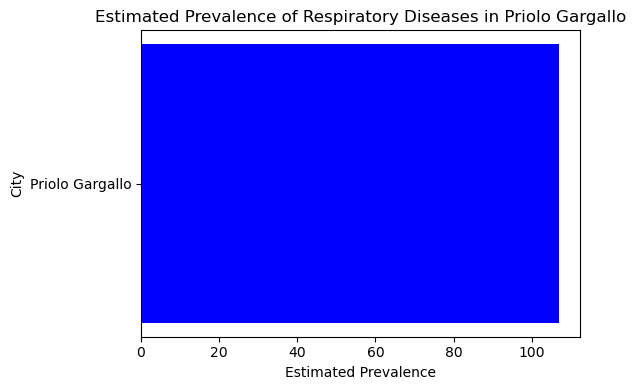

In [37]:
priolo_gargallo_data = df[df['City'] == 'Priolo Gargallo']

plt.figure(figsize=(6, 4))
plt.barh(priolo_gargallo_data['City'], priolo_gargallo_data['Estimated Prevalence'], color='blue')
plt.xlabel('Estimated Prevalence')
plt.ylabel('City')
plt.title('Estimated Prevalence of Respiratory Diseases in Priolo Gargallo')
plt.tight_layout()
plt.show()